<a href="https://colab.research.google.com/github/PosiTriOnix/BigTechStocks/blob/main/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Procesar y preparar la base de datos**

In [1]:
# Conectamos nuestro drive al nb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Skill up data Laboratoria/Proyecto 3/DataSets/big_tech_stock_prices.xlsx')

# revisamos las primeras filas
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0


In [6]:
# observamos los estadisticos robustos de la data
df.describe()

,date,open,high,low,close,adj_close,volume
count,45089,45089.000000,45089.000000,45089.000000,45089.000000,45089.000000,4.508900e+04
mean,2016-08-03 16:49:50.565326336,89.267274,90.370562,88.112582,89.272028,85.210443,5.298188e+07
min,2010-01-04 00:00:00,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,2013-05-30 00:00:00,25.670000,25.930180,25.360001,25.660000,22.077059,9.629500e+06
50%,2016-08-09 00:00:00,47.930000,48.459999,47.470001,47.970001,45.378979,2.646420e+07
75%,2019-10-22 00:00:00,128.660004,129.847031,127.250000,128.639999,113.679848,5.840030e+07
max,2023-01-24 00:00:00,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09
std,NaN,101.625934,103.000049,100.123385,101.591905,100.994995,9.324966e+07


In [5]:
df.info()
# notamos una fila vacia que solo contiene stock symbol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45090 entries, 0 to 45089
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45090 non-null  object        
 1   date          45089 non-null  datetime64[ns]
 2   open          45089 non-null  float64       
 3   high          45089 non-null  float64       
 4   low           45089 non-null  float64       
 5   close         45089 non-null  float64       
 6   adj_close     45089 non-null  float64       
 7   volume        45089 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.8+ MB


In [7]:
# revisamos valores nulos y duplicados
df.isna().sum()
df.duplicated().sum()

np.int64(1)

In [8]:
#  1. Revisar duplicados
print("Duplicados antes:", df.duplicated().sum())

# Eliminar duplicados
df = df.drop_duplicates()
print("Duplicados después:", df.duplicated().sum())

#  2. Revisar nulos
print("\nValores nulos por columna antes:")
print(df.isna().sum())

# Eliminar filas con valores nulos
df = df.dropna()

print("\nValores nulos por columna después:")
print(df.isna().sum())

#  3. Ver forma final del dataset
print("\nDimensiones finales (filas, columnas):", df.shape)

#  4. Revisar rango temporal
print("\nPeriodo de datos:", df['date'].min(), "→", df['date'].max())

#  5. Revisar cuántas empresas hay
print("\nNúmero de empresas:", df['stock_symbol'].nunique())
print("Empresas:", df['stock_symbol'].unique())


Duplicados antes: 1
Duplicados después: 0

Valores nulos por columna antes:
stock_symbol    0
date            1
open            1
high            1
low             1
close           1
adj_close       1
volume          1
dtype: int64

Valores nulos por columna después:
stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64

Dimensiones finales (filas, columnas): (45088, 8)

Periodo de datos: 2010-01-04 00:00:00 → 2023-01-24 00:00:00

Número de empresas: 14
Empresas: ['AAPL' 'ADBE' 'AMZN' 'CRM' 'CSCO' 'GOOGL' 'IBM' 'INTC' 'META' 'MSFT'
 'NFLX' 'NVDA' 'ORCL' 'TSLA']



---

# **EDA - Exploratory Data Analysis**

In [12]:
# Esto nos muestra el rango de tiempo registrado en los datos.
df['date'].min(), df['date'].max()

(Timestamp('2010-01-04 00:00:00'), Timestamp('2023-01-24 00:00:00'))

In [13]:
# Obtenemos el numero de empresas que se analizan
df['stock_symbol'].nunique(), df['stock_symbol'].unique()

(14,
 array(['AAPL', 'ADBE', 'AMZN', 'CRM', 'CSCO', 'GOOGL', 'IBM', 'INTC',
        'META', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'TSLA'], dtype=object))

### Visualizar tendencias en el tiempo

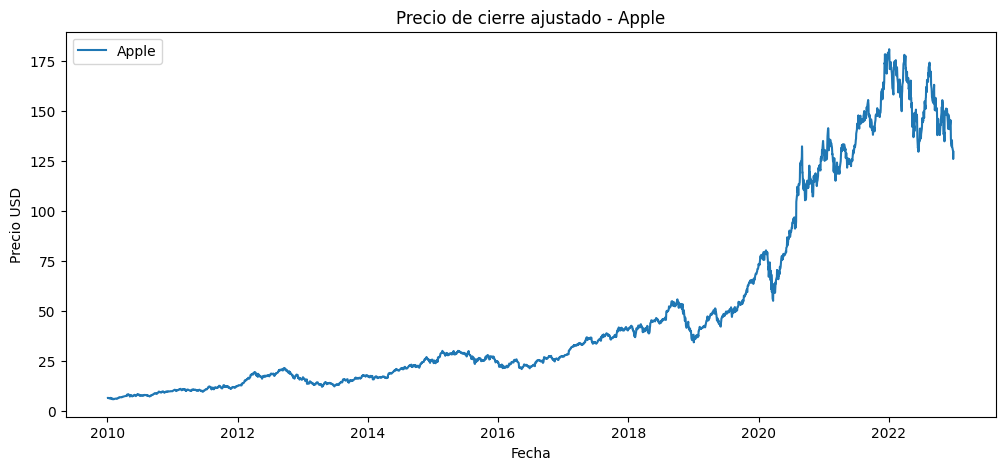

In [14]:
import matplotlib.pyplot as plt

apple = df[df['stock_symbol'] == 'AAPL']
plt.figure(figsize=(12,5))
plt.plot(apple['date'], apple['adj_close'], label='Apple')
plt.title('Precio de cierre ajustado - Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend()
plt.show()

# Esta es una serie temporal de subidas y bajadas de las acciones de Apple en el tiempo

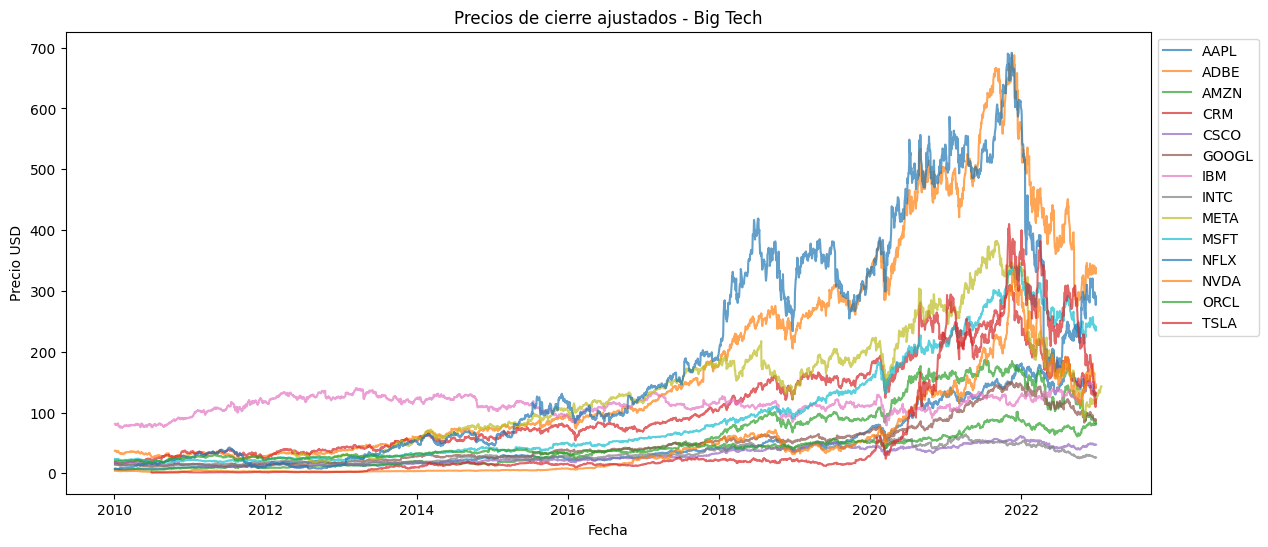

In [15]:
plt.figure(figsize=(14,6))

# Filtramos el dataset para quedarnos con la columna de interés
for empresa in df['stock_symbol'].unique():
    subset = df[df['stock_symbol'] == empresa]
    plt.plot(subset['date'], subset['adj_close'], label=empresa, alpha=0.7)

plt.title('Precios de cierre ajustados - Big Tech')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # Leyenda fuera del gráfico
plt.show()

# Esta grafica muestra la evolucion de precios de todas las empresas

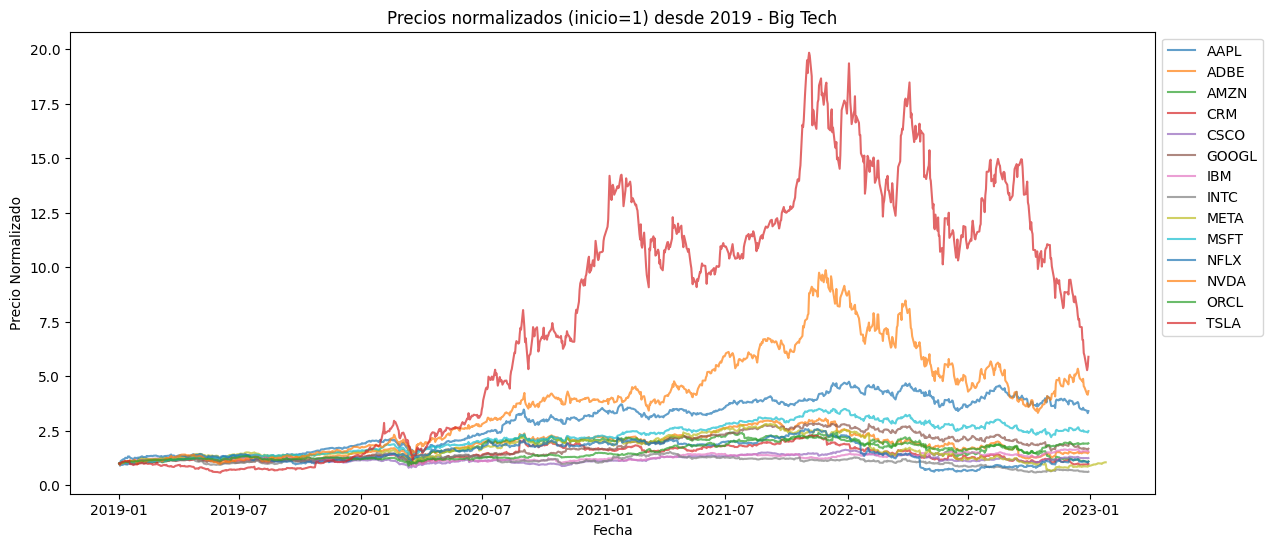

In [17]:
df_filtrado = df[df['date'] >= "2019-01-01"].copy()

# Normalizar precios por empresa a partir de 2019
df_filtrado['normalized_price'] = df_filtrado.groupby('stock_symbol')['adj_close'].transform(lambda x: x / x.iloc[0])

plt.figure(figsize=(14,6))
for empresa in df_filtrado['stock_symbol'].unique():
    subset = df_filtrado[df_filtrado['stock_symbol'] == empresa]
    plt.plot(subset['date'], subset['normalized_price'], label=empresa, alpha=0.7)

plt.title('Precios normalizados (inicio=1) desde 2019 - Big Tech')
plt.xlabel('Fecha')
plt.ylabel('Precio Normalizado')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# Esta grafica muestra solo los precios de las empresas despues de 2019

In [18]:
!pip install plotly

In [20]:
# Si no lo tienes:
# !pip install plotly

import plotly.express as px

# Filtrar periodo
df19 = df[df['date'] >= "2019-01-01"].copy()

fig = px.line(
    df19,
    x="date",
    y="adj_close",
    color="stock_symbol",
    title="Big Tech – Precio de cierre ajustado (desde 2019)",
    labels={"date": "Fecha", "adj_close": "Precio (USD)", "stock_symbol": "Empresa"},
)

# Controles de rango (rangeselector + rangeslider)
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="1A", step="year", stepmode="backward"),
            dict(count=3, label="3A", step="year", stepmode="backward"),
            dict(step="all", label="Todo")
        ])
    ),
    rangeslider=dict(visible=True),
    type="date"
)

# Hover más claro
fig.update_traces(hovertemplate="%{x|%Y-%m-%d}<br>%{fullData.name}: %{y:.2f} USD")

# Layout ancho (opcional)
fig.update_layout(legend_title_text="Ticker", hovermode="x unified", height=600)

fig.show()

# Esta grafica es dinamica, para elegir el tiempo y las empresas que aparecen

### Volatilidad y distribuciones

In [21]:
df['daily_return'] = df.groupby('stock_symbol')['adj_close'].pct_change()
df.head()

# Creamos una columna de retorno diario

,stock_symbol,date,open,high,low,close,adj_close,volume,normalized_price,daily_return
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0,1.000000,NaN
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0,1.001729,0.001729
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0,0.985795,-0.015906
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0,0.983972,-0.001849
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0,0.990514,0.006648


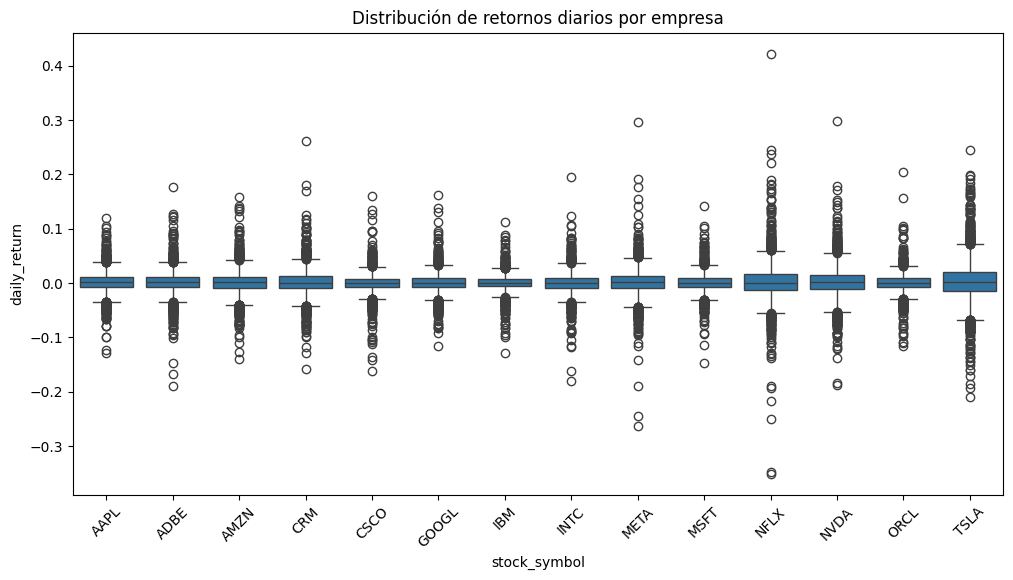

In [22]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='stock_symbol', y='daily_return')
plt.title('Distribución de retornos diarios por empresa')
plt.xticks(rotation=45)
plt.show()

### Correlacion entre empresas

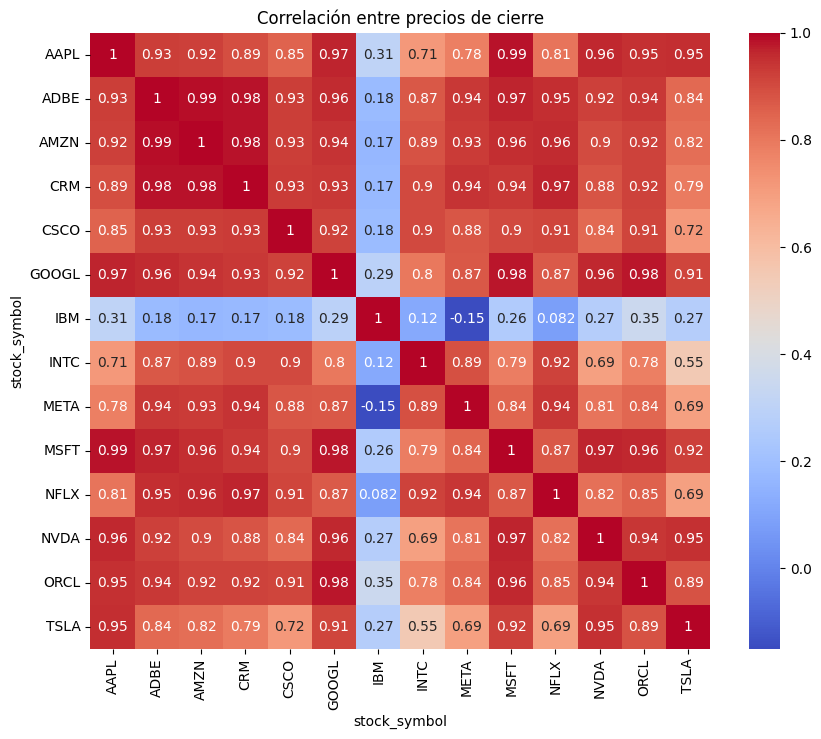

In [23]:
pivot = df.pivot(index='date', columns='stock_symbol', values='adj_close')
corr = pivot.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre precios de cierre')
plt.show()


### Estadisticas resumidas

In [24]:
resumen = df.groupby('stock_symbol')['daily_return'].agg(['mean','std']).reset_index()
resumen.rename(columns={'mean':'retorno_prom','std':'volatilidad'}, inplace=True)
print(resumen)

# Retorno promedio y volatilidad por empresa

   stock_symbol  retorno_prom  volatilidad
0          AAPL      0.001079     0.018092
1          ADBE      0.000876     0.019975
2          AMZN      0.000990     0.020811
3           CRM      0.000864     0.023133
4          CSCO      0.000448     0.016845
5         GOOGL      0.000674     0.017032
6           IBM      0.000270     0.014187
7          INTC      0.000365     0.018606
8          META      0.000812     0.025248
9          MSFT      0.000844     0.016377
10         NFLX      0.001654     0.032778
11         NVDA      0.001475     0.028087
12         ORCL      0.000552     0.016442
13         TSLA      0.002024     0.036001
